<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Finan%C3%A7as_stickers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science em Finança**

- Crédito pela base e estrutura: Ronisson Lucas Calmon da Conceição e Odemir Depieri Jr.




In [8]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 13.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install dbnomics

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import date as dt






In [9]:
from dbnomics import fetch_series
import quandl
import yfinance as yf

- Extraindo preço de ações

One sticker

In [10]:
itsa = yf.Ticker('ITSA4.SA')

In [11]:
type(itsa)

yfinance.ticker.Ticker

In [12]:
itsa = itsa.history(period = 'max')

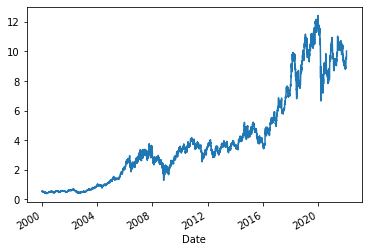

In [13]:
itsa.Close.plot();

In [14]:
oi = yf.Ticker('OIBR3.SA')

In [15]:
oi = oi.history(period = 'max')

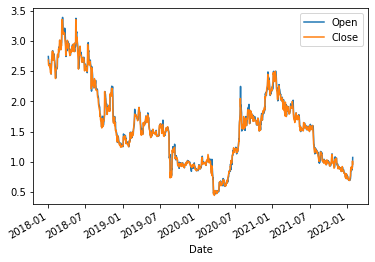

In [16]:
oi.loc['2018-1-1':, ['Open', 'Close']].plot();

In [17]:
petr = yf.Ticker('PETR4.SA')
petr

yfinance.Ticker object <PETR4.SA>

In [18]:
btc = yf.Ticker('BTC-USD')

In [19]:
btc = btc.history(period = 'max')

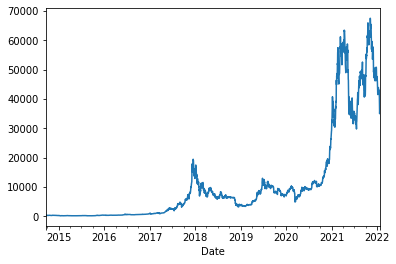

In [20]:
btc.Close.plot();

In [21]:
dolar = yf.Ticker('USDBRL=X')
dolar = dolar.history(period = 'max')

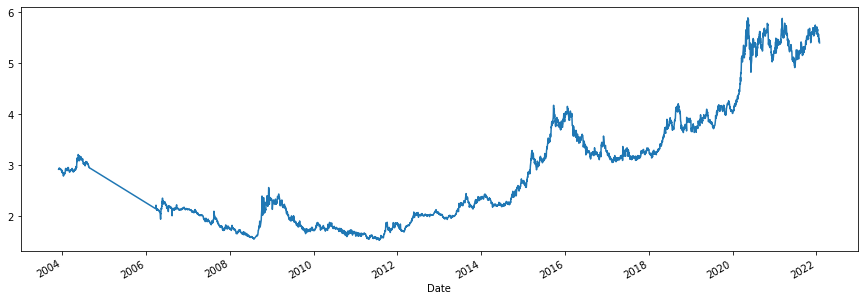

In [22]:
dolar.Close.plot(figsize = (15, 5));

In [23]:
dolar.Close

Date
2003-12-01    2.923000
2003-12-02    2.931000
2003-12-03    2.931000
2003-12-04    2.943000
2003-12-05    2.934000
                ...   
2022-01-24    5.457100
2022-01-25    5.486100
2022-01-26    5.440704
2022-01-27    5.429167
2022-01-28    5.395300
Name: Close, Length: 4293, dtype: float64

In [24]:
type(petr)

yfinance.ticker.Ticker

Para pegar valores históricos podemos usar o método history().

Períodos válidos: “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”

In [25]:
# pega as ações para 5 anos
petr.history(period = '5y', actions = False).head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-30,11.694993,11.710073,11.189794,11.189794,26779500
2017-01-31,11.302898,11.589429,11.235035,11.325520,30807200
2017-02-01,11.506486,11.619591,11.242576,11.325520,35977000
2017-02-02,11.302899,11.521567,11.204875,11.227496,39306700
2017-02-03,11.250115,11.566808,11.137011,11.566808,40213400


Intervalos válidos: “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”

In [26]:
# dados de 1 dia com intervalo de 1 minuto
petr.history(period = '1d',
             interval = '1m', actions = False)

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-01-28 11:03:00-02:00,33.799999,34.000000,33.799999,33.919998,0
2022-01-28 11:04:00-02:00,33.910000,34.049999,33.900002,34.000000,248700
2022-01-28 11:05:00-02:00,33.990002,34.049999,33.970001,34.000000,121500
2022-01-28 11:06:00-02:00,33.990002,34.000000,33.849998,33.939999,297700
2022-01-28 11:07:00-02:00,33.919998,33.939999,33.860001,33.889999,117200
...,...,...,...,...,...
2022-01-28 15:14:00-02:00,33.509998,33.580002,33.509998,33.560001,83100
2022-01-28 15:15:00-02:00,33.570000,33.580002,33.520000,33.549999,87200
2022-01-28 15:16:00-02:00,33.560001,33.560001,33.520000,33.529999,69400


In [27]:
# pega os stcikers para 5 anos com intervalo temporal mensal
petr.history(interval = '1mo',
            period = '5y', actions = False).head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-02-01,11.506485,12.237893,10.759997,11.446163,6.766671e+08
2017-03-01,11.694991,11.725153,9.666653,10.925881,9.638648e+08
2017-04-01,10.963585,11.431083,10.217096,10.533789,6.628584e+08
2017-05-01,10.533787,11.966442,9.387663,9.772218,1.041819e+09
2017-06-01,9.923022,10.058748,8.739197,9.327339,8.586159e+08


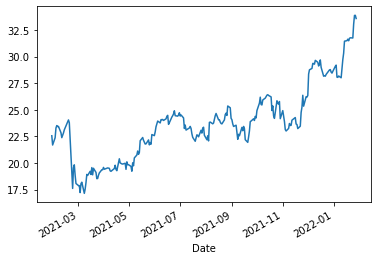

In [28]:
# pega os dados de um ano com intervalo de um dia
petr.history(period = '1y', interval = '1d', actions = False)['Close'].plot()

In [29]:
# podemos usar o recorte temporal usando 'start' e 'end'
petr.history(start = '2021-1-1', end = '2021-5-1', interval = "1wk").head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-01,23.034526,25.318471,22.953246,25.196552,322634600.0,0.0,0
2021-01-08,25.570436,25.814275,23.343386,23.936726,326144900.0,0.0,0
2021-01-15,23.611606,23.668503,22.359907,22.392418,312776100.0,0.0,0
2021-01-22,21.888489,23.123933,21.563373,22.563107,251861300.0,0.0,0
2021-01-29,22.368036,23.684759,21.693419,23.424665,292598700.0,0.0,0


Vamos extrair dados financeiros da Petrobras e do Magazine Luiza.

In [30]:
petr = yf.Ticker('PETR4.SA').history(period = 'max', actions = False)
mglu = yf.Ticker('MGLU3.SA').history(period = 'max', actions = False)

In [31]:
# estatísticas descritivas para as ações da PETR4
petr.describe()

,Open,High,Low,Close,Volume
count,5548.000000,5548.000000,5548.000000,5548.000000,5.548000e+03
mean,12.615512,12.801320,12.414488,12.597265,5.791514e+08
std,6.856621,6.955344,6.748104,6.843770,4.012823e+09
min,2.399076,2.425656,2.344551,2.385444,0.000000e+00
25%,6.275423,6.352098,6.161604,6.265361,2.083050e+07
50%,12.707991,12.890879,12.492992,12.699196,3.277335e+07
75%,17.536510,17.805268,17.259263,17.536510,5.283852e+07
max,36.804004,36.804004,33.360001,33.880001,7.356416e+10


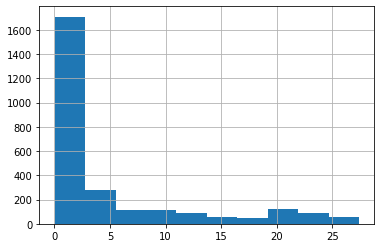

In [32]:
mglu['Close'].hist()

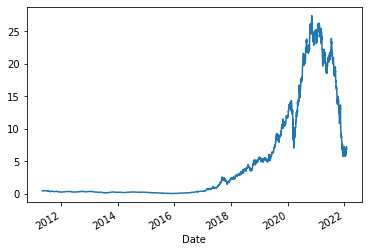

In [33]:
mglu.Close.plot();

In [34]:
mglu.describe()

,Open,High,Low,Close,Volume
count,2668.000000,2668.000000,2668.000000,2668.000000,2.668000e+03
mean,4.716757,4.810574,4.613183,4.709299,3.812148e+07
std,7.271513,7.406264,7.120917,7.260301,3.316270e+07
min,0.030012,0.030310,0.029005,0.029192,0.000000e+00
25%,0.233416,0.236640,0.228721,0.232806,1.819600e+07
50%,0.393110,0.398516,0.384982,0.393767,2.991950e+07
75%,5.741675,5.871907,5.660844,5.747945,4.637295e+07
max,28.100333,28.260051,26.692823,27.401571,4.304640e+08


In [35]:
petr.loc['2015-1-1':,:].to_csv('petr.csv')

In [36]:
mglu.loc['2015-1-1':,:].to_csv('mglu.csv')

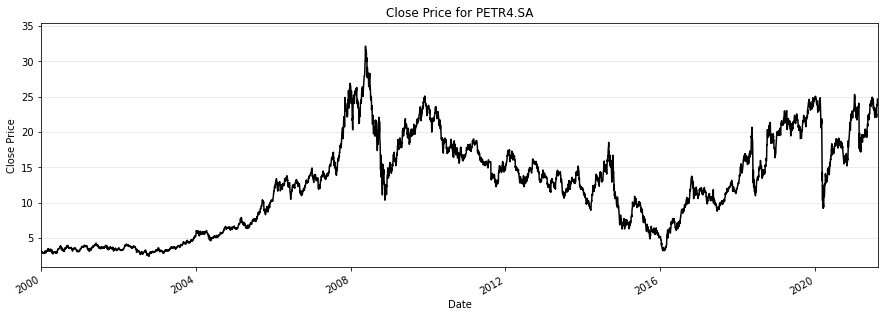

In [37]:
fig, ax = plt.subplots(figsize = (15, 5))
petr['Close'].plot(ax = ax, color = 'k')
ax.set(title = 'Close Price for PETR4.SA', ylabel = 'Close Price')
ax.grid(axis = 'y', alpha = 0.3)
ax.set_xlim([dt(2000, 1, 1),dt(2021, 8, 17)]);

In [38]:
df = pd.concat([mglu.loc['2015-1-1':,:],
           petr.loc['2015-1-1':,:]], axis = 1, 
          keys = ['MGLU', 'PETR']
         ).dropna()

In [39]:
# checando o tipo do objeto
type(df.columns)

pandas.core.indexes.multi.MultiIndex

In [40]:
# pegando o preço de fechamento da PETR4
petr_close_price = df.loc[:,('PETR', 'Close')]

In [41]:
# pegando a data de preço de fechamento máximo e o preço respectivo
petr_close_price.idxmax(), petr_close_price.max()

(Timestamp('2022-01-27 00:00:00'), 33.880001068115234)

In [42]:
# pegando a data de preço de fechamento mínimo e o preço respectivo

petr_close_price.idxmin(),petr_close_price.min()

(Timestamp('2016-01-26 00:00:00'), 3.1669225692749023)

In [43]:
trace = go.Scatter(x = petr.index,
                   y = petr['Close'],
                   mode = 'lines',
                   line = dict(color = 'black',
                               width = 1
                              )
                  )
layout = go.Layout()

fig = go.Figure(data = trace, layout = layout)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(count = 5,
                     label = "5y",
                     step = "year",
                     stepmode = 'backward'
                    ),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.update_layout(
    title_font_size = 20,
    font_family = 'Arial',
    font_color = 'grey',
    title_font_color = 'black',
    plot_bgcolor = 'white',
    legend_title = 'Legend',
    legend_title_font_color = 'dimgrey',
    xaxis = dict(title = 'Time'),
    yaxis = dict(title = 'Close'),
    title = dict(
        text = 'Close Price for PETR4.SA',
        x = 0.5,
        y = 0.9,
        xanchor = 'center',
        yanchor = 'top')
    )

fig.update_yaxes(tickprefix="$")

#altera a configuração das linhas vertical e horizontal dos subplots
fig.update_xaxes(showline=True, linewidth = 1, linecolor='lightgrey')
fig.update_yaxes(showline=True, linewidth = 1, linecolor='lightgrey')

fig

Múltiplos Stickers

In [44]:
data = yf.download('ABEV3.SA ITUB4.SA TOTS3.SA', start = '2010-1-1',
                  end = '2020-1-12', group_by = 'tickers')

[*********************100%***********************]  3 of 3 completed


In [45]:
data.head()

ITUB4.SA                        ...  ABEV3.SA                   
                 Open       High        Low  ...     Close Adj Close   Volume
Date                                         ...                             
2010-01-04  17.708261  18.436810  17.708261  ...  6.113138  4.030631   818417
2010-01-05  18.313868  18.386723  18.168158  ...  6.149098  4.054339  1604298
2010-01-06  18.327526  18.436810  18.077089  ...  6.211828  4.095701   508069
2010-01-07  18.099855  18.236460  18.008787  ...  6.240995  4.114931  2690516
2010-01-08  18.113516  18.113516  17.721922  ...  6.229008  4.107027   588159

[5 rows x 18 columns]

[*********************100%***********************]  9 of 9 completed


(736696.0, 738183.0)

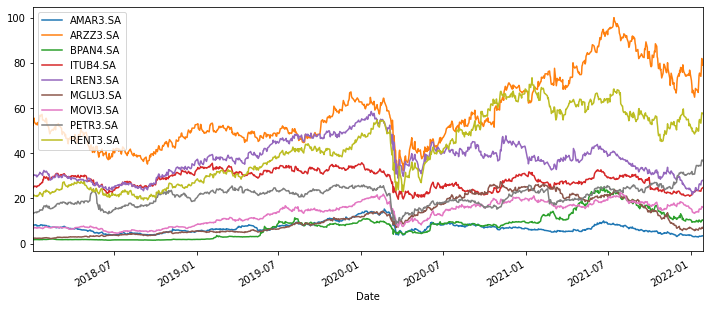

In [46]:
# stickers
sticker = yf.download('ARZZ3.SA MGLU3.SA AMAR3.SA LREN3.SA MOVI3.SA RENT3.SA BPAN4.SA ITUB4.SA PETR3.SA')
# preenche missing data
df = sticker.fillna(0)
# plot
filtered_data = df.loc['2018-1-1':, ('Adj Close')]
filtered_data.plot(figsize = (12, 5));
# ajusta o limite do eixo x
plt.xlim([filtered_data.index.min(), filtered_data.index.max()])

**DBnomics**

In [47]:
cocoa_brazil = fetch_series(['FAO/TP/661.21.5622','FAO/TP/661.21.5922'])

In [48]:
cocoa_brazil = pd.concat([cocoa_brazil.query('Element == "Import Value"')['value'],
           cocoa_brazil.query('Element == "Export Value"')[['value', 'period']],
          ], axis = 1)

In [49]:
cocoa_brazil.columns = ['import_cocoa_beans', 'export_cocoa_beans', 'period']

In [50]:
cocoa_brazil['balance'] = cocoa_brazil['export_cocoa_beans']-cocoa_brazil['import_cocoa_beans']

In [51]:
cocoa_brazil.set_index('period', inplace = True)

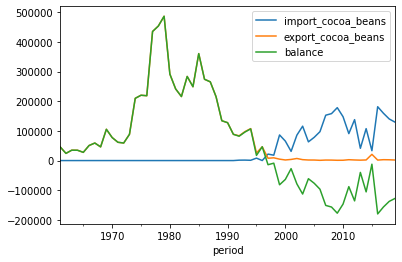

In [52]:
cocoa_brazil.plot();

In [53]:
data = fetch_series([
    'FAO/TP/10.21.5922',  #Total Merchandise Trade – Export Value for Brazil,
    'FAO/TP/10.21.5622',  #Total Merchandise Trade – Import Value for Brazil
])

In [54]:
export_br = data.query('Element == "Export Value"')['value']
import_br = data.query('Element == "Import Value"')['value']
saldo = export_br-import_br
df = pd.concat([export_br, import_br, saldo], axis = 1)
df.columns = ['Export', 'Import', 'Trade Balance']
df.index = data[(data['Element'] == 'Export Value')]['period']

In [55]:
colors = ['#2F4F4F', '#C0C0C0', '#000000']
dash = ['solid', 'solid', 'dot']

#iterate over df to create traces
traces = list()
for index, column in enumerate(df.columns):
    trace = go.Scatter(
        x = df.index,
        y = df[column],
        name = f'Total {column}',
        line = dict(color = colors[index],
                    dash = dash[index]
                   )
    )
    traces.append(trace)
    
fig = go.Figure(traces)


fig.update_layout(
    #title = 'Total Merchandise Trade for Brazil (1961-2019)',
    title_font_size = 20,
    font_family = 'Arial',
    font_color = 'grey',
    title_font_color = 'black',
    plot_bgcolor = 'white',
    legend_title = 'Legend',
    legend_title_font_color = 'dimgrey',
    xaxis = dict(title = 'Time'),
    yaxis = dict(title = 'Values'),
    title = dict(
        text = 'Total Merchandise Trade for Brazil (1961-2019)',
        x = 0.5,
        y = 0.9,
        xanchor = 'center',
        yanchor = 'top')
    )

fig.update_yaxes(tickprefix="$")

#altera a configuração das linhas vertical e horizontal dos subplots
fig.update_xaxes(showline=True, linewidth = 1, linecolor='lightgrey')
fig.update_yaxes(showline=True, linewidth = 1, linecolor='lightgrey')

fig.show()

**quandl (Nasdaq)**

- Vamos usar o quandl para extrair dados macroeconômicos. Qual a importância de dados macroeconômicos para nossa análise?

In [56]:
def plot_line(serie, name):
    fig, ax = plt.subplots()
    serie.plot(figsize = (12, 4), color = 'k', ax = ax)
    ax.legend([name])
    ax.set_ylabel('Value')
    ax.grid(True)

In [57]:
quandl.ApiConfig.api_key = 'hV8raMsTJbxzK_2sATkf' 
ipca = quandl.get('BCB/13522', start = '2010-1-1')
selic = quandl.get('BCB/4189', start = '2010-1-1',order='asc',)
inflation_target = quandl.get('BCB/13521', order = 'asc')
dolar = quandl.get('BCB/10813', start_date = '2000-1-1')

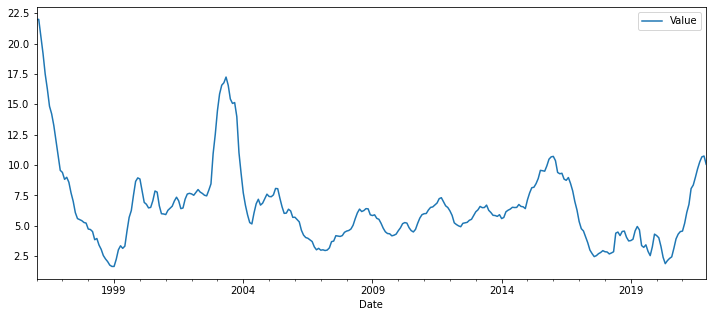

In [58]:
ipca.loc['1996-1-1':].plot(figsize = (12, 5));

In [59]:
ipca

,Value
Date,
1980-12-31,99.25
1981-01-31,99.67
1981-02-28,103.07
1981-03-31,101.03
1981-04-30,103.27
...,...
2021-08-31,9.68
2021-09-30,10.25
2021-10-31,10.67


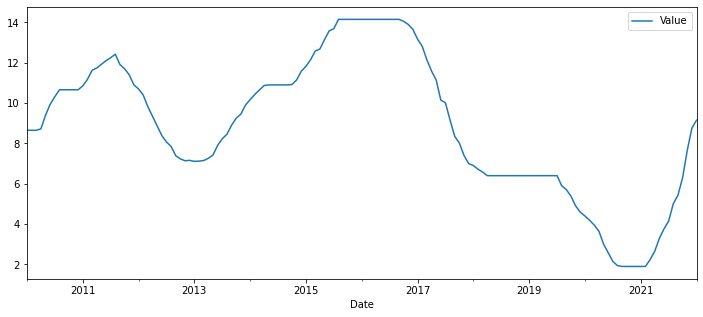

In [60]:
selic.loc['2010-1-1':].plot(figsize = (12, 5));

In [61]:
inflation_target

,Value
Date,
1999-12-31,8.00
2000-12-31,6.00
2001-12-31,4.00
2002-12-31,3.50
2003-12-31,4.00
2004-12-31,5.50
2005-12-31,4.50
2006-12-31,4.50
2007-12-31,4.50


In [62]:
dolar

,Value
Date,
2000-01-03,1.8003
2000-01-04,1.8329
2000-01-05,1.8536
2000-01-06,1.8453
2000-01-07,1.8273
...,...
2022-01-21,5.4395
2022-01-24,5.4904
2022-01-25,5.4965


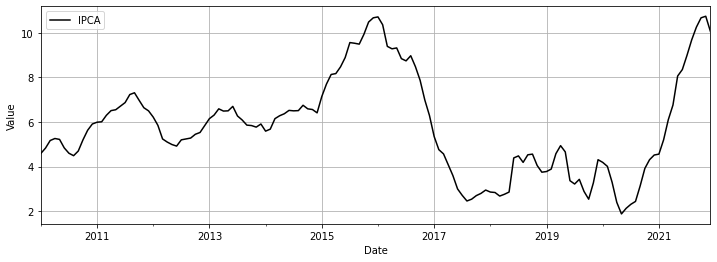

In [63]:
plot_line(ipca.loc['2010-1-1':], 'IPCA')

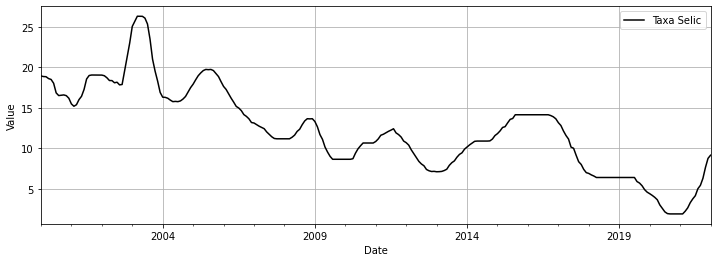

In [64]:
plot_line(selic.loc['2000-1-1':], 'Taxa Selic')

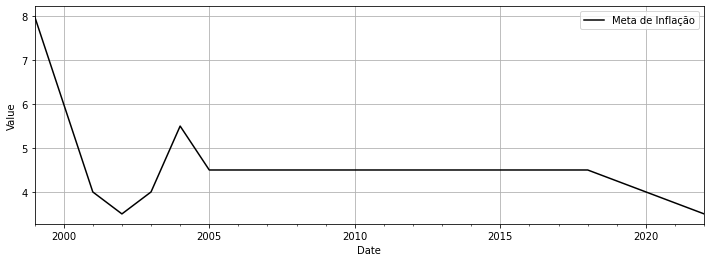

In [65]:
plot_line(inflation_target, name = 'Meta de Inflação')

energia eletrica consumida no Brasil

In [66]:
# consumo de energia por região (comercial); Unidades: GWh
energia_norte = quandl.get('BCB/1407', order = 'asc')
energia_nordeste = quandl.get('BCB/1412', orde = 'asc')
energia_sul = quandl.get('BCB/1417', order = 'asc')
energia_sudeste = quandl.get('BCB/1427', order = 'asc')
energia_centro_oeste = quandl.get('BCB/1422', order = 'asc')

In [67]:
data = [energia_norte, 
        energia_nordeste,
        energia_sul, 
        energia_sudeste, 
        energia_centro_oeste]
names = ['Região Norte', 
         'Região Nordeste', 
         'Região Sul', 
         'Região Sudeste', 
         'Região Centro-Oeste']

In [68]:
energy_br = pd.concat(data, axis = 1)
energy_br.columns = names

In [69]:
energy_br

,Região Norte,Região Nordeste,Região Sul,Região Sudeste,Região Centro-Oeste
Date,,,,,
1979-01-31,29.0,124.0,154.0,681.0,50.0
1979-02-28,30.0,124.0,153.0,671.0,52.0
1979-03-31,31.0,126.0,155.0,694.0,51.0
1979-04-30,29.0,124.0,147.0,688.0,56.0
1979-05-31,31.0,121.0,141.0,692.0,53.0
...,...,...,...,...,...
2021-06-30,441.0,1144.0,1133.0,3380.0,579.0
2021-07-31,442.0,1134.0,1141.0,3256.0,544.0
2021-08-31,497.0,1158.0,1195.0,3336.0,570.0


In [70]:
# salvando os dados em csv
energy_br.to_csv('energy.csv')

In [71]:
traces = list()
index = energy_br.index
for column in energy_br:
    trace = go.Scatter(x = index,
                       y = energy_br[column],
                       mode = 'lines',
                       line = dict(width = 1),
                       name = column
                      )
    traces.append(trace)

In [72]:
layout = go.Layout(title = 'Consumo de Energia Elétrica (Comercial) por regiões',
                   yaxis = dict(title = 'Value (GWh)')
                  )

fig = go.Figure(data = traces, layout = layout)
fig.update_xaxes(rangeslider_visible = True)
